### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

*independent variable:* congruent and incongruent condition [1]

*dependent variable:* duration of completion the test (time)

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

*H0* - Null Hypothesis - There is no change in the duration of completion of two reading tests (congruent or incongruent condition): $\mu_i = \mu_c$

*H1* - Alternate Hypothesis - tests at incongruent condition take more time to complete : $\mu_i \neq \mu_c$

where $\mu_i = $ population mean duration at incongruent condition and 
$\mu_c = $ population mean duration at congruent condition

Justification: To determine the statistical significant difference between the two groups (one group performs the test on congruent and the other one on incongruent conditions), we have to compare the means of the duration time of each group. Therefor, we assume that the distribution of the population are normal. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [41]:
# Import required libraries

import pandas as pd
import numpy as np
from scipy.stats import t
import seaborn as sns
import statsmodels.stats.api as sms
import math
sns.set_style("darkgrid")
% matplotlib inline

In [18]:
# Load data and inspect dataframe
df = pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [19]:
# Show means (as measure of tendency) and standard deviations (as measure of variability) of the congruent and incongruent group
# Determine the sample size
size_c = df.Congruent.size
size_i = df.Incongruent.size
mean_c = df.Congruent.mean()
mean_i = df.Incongruent.mean()
median_c = df.Congruent.median()
median_i = df.Incongruent.median()
std_c = np.std(df.Congruent)
std_i = np.std(df.Incongruent)


print('Sample Size:')
print('Congruent group: ', size_c)
print('Incongruent group: ', size_i)
print('\nMeasure of central tendency:')
print('Mean duration of congruent group: ', mean_c)
print('Mean duration of incongruent group: ', mean_i)
print('Median duration of congruent group: ', median_c)
print('Median duration of incongruent group: ', median_i)
print('\nMeasure of variability:')
print('Standard Deviation of duration of congruent group: ', std_c)
print('Standard Deviation of duration of incongruent group: ', std_i)

Sample Size:
Congruent group:  24
Incongruent group:  24

Measure of central tendency:
Mean duration of congruent group:  14.051125
Mean duration of incongruent group:  22.0159166667
Median duration of congruent group:  14.3565
Median duration of incongruent group:  21.0175

Measure of variability:
Standard Deviation of duration of congruent group:  3.48441571277
Standard Deviation of duration of incongruent group:  4.69605513451


In [20]:
# Show further information of the dataset
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

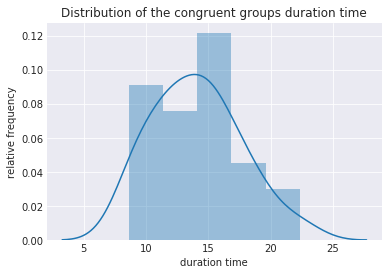

In [21]:
# Visualize data of congruent group
ax = sns.distplot(df.Congruent);
ax.set_title('Distribution of the congruent groups duration time');
ax.set_xlabel('duration time');
ax.set_ylabel('relative frequency');

Observations: 
The distribution of the congruent groups sample data is nearly normal. The mean of the data is around 14 or 15.

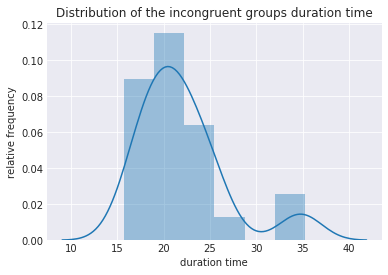

In [22]:
# Visualize data of incongruent group
ax = sns.distplot(df.Incongruent);
ax.set_title('Distribution of the incongruent groups duration time');
ax.set_xlabel('duration time');
ax.set_ylabel('relative frequency');

Observations:
The incongruent groups sample data is normally distributed between 10 and 30 but shows a further local maximum at the upper end of the distribution. Thus, the distribution is right skewed. The mean of the data is a bit larger than 20.

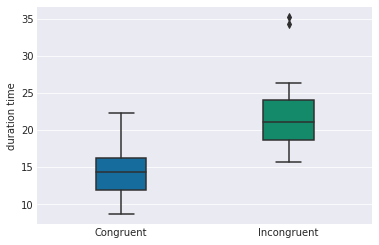

In [23]:
#Compare both datasets in a boxplot
ax = sns.boxplot(data=df, orient="v",width=0.3, palette="colorblind");
ax.set_ylabel("duration time");

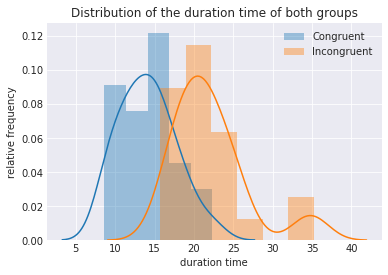

In [24]:
#Compare distributions of both datasets
ax = sns.distplot(df['Congruent'],label = "Congruent")
ax = sns.distplot(df['Incongruent'],label = "Incongruent")
ax.set_xlabel("duration time");
ax.set_ylabel("relative frequency");
ax.set_title('Distribution of the duration time of both groups');
ax.legend();

Overall observations: The visualizations of the data show distributions that are positively skewed. Thereby, the histogram of 
the congruent group is only slightly right skewed and appears quite normally distributed. The calculated means in (3) are pretty close to the maxima in the depicted histograms.
Furthermore, the boxplot and the comparison of both distribution in one histogram display the difference between both datasets. The response time at congruent conditions lays between 8 and 23, while the response time at incongruent conditions is much larger (around 15.5 and 35) 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

As shown in the beginning, we will perform a two tailed paired t-test to examine the stated hypotheses. At first, we have to determine the t-critical value of our dataset with a confidence level of 95% (2.5% to 97.5%). Thus, the Type I error $\alpha$ is 5%. The corresponding degrees of freedom can be calculated by the given size of the datasets determined above.

In [38]:
# Perform a statistical t-test with confidence level 'conflevel' and degrees of freedom 'degfree' using the scipy.stats lib
degfree = size_c - 1
conflevel = 0.975

# t-critical_value
t_crit = t.ppf(conflevel,degfree)

print('For a confidence level of ', conflevel,'% and ', degfree,' degrees of freedom, the t-critical value is ', t_crit,'.')

For a confidence level of  0.975 % and  23  degrees of freedom, the t-critical value is  2.06865761042 .


For further examinations, we have to observe the difference between the datasets regarding our hypotheses which can be converted into:

*H0*: $\mu_i - \mu_c = 0$

*H1*: $\mu_i - \mu_c \neq 0$

In [39]:
df['diffs'] = df.Congruent - df.Incongruent
df

,Congruent,Incongruent,diffs
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


In [36]:
# Calculate the statistics of the difference
# we use the built-in functions of the statsmodels.stats.api library to determine the confidence interval 
mean_diffs = df.diffs.mean()
median_diffs = df.diffs.median()
std_diffs = df.diffs.std()
cm = sms.CompareMeans(sms.DescrStatsW(df.Congruent),sms.DescrStatsW(df.Incongruent))
lowbound_diffs,upbound_diffs = cm.tconfint_diff(alpha=0.05,usevar='unequal')

print('Mean of difference: ',mean_diffs)
print('Median of difference: ',median_diffs)
print('Standard deviation of difference: ',std_diffs)
print('Confidence interval 95% of difference: (',lowbound_diffs,',',upbound_diffs,')')


Mean of difference:  -7.96479166667
Median of difference:  -7.666499999999999
Standard deviation of difference:  4.86482691036
Confidence interval 95% of difference: ( -10.4246981882 , -5.50488514517 )


In [43]:
# Calculate the t-value
t_val = mean_diffs/(std_diffs/math.sqrt(size_c))
print('t-value: ',t_val)

t-value:  -8.02070694411


The critical t-value ($\pm 2.069$) is much larger than the calculated t-value (-8.0207) in our t-statistic for the means of the duration in colour recognition. Thus, the t-statistic is in the critical region and the Null hypothesis H0 is rejected.

##### Answer: Null hypothesis rejected
At Type I error $alpha=0.05$, the mean duration of completing a test at incongruent conditions is significantly larger than mean time needed for completing a test at congruent conditions. The confidence interval of the difference between durations at the examined conditions is between -10.4247 and -5.5049.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

##### Causes of the Stroop effect
- The brains processing speed to recognize the color of a word differs from the ability and speed to read a word. The word processing is significantly faster than the color processing, causing a confusion if a incongruent condition exists. [2]
- The human brain also handles a lot of things automatically. Since, the brain understands words automatically and does not need to be controlled, recognizing colors is not an "automatic process". An incongruent state between the word and its color can affect this automaticity and increase the response time. [1]
- Another cause is the selective attention the brain needs to recognize a color than encode a word. Thus, the brain needs more time to process the information especially when the word is not congruent with its color.

##### Alternatives
Similar results in comparison to the original Stroop effect can be achieved using numbers that can be displayed in different sizes incongruent to their actual numerical values. (Numerical Stroop effect, [3])

### References
[1] https://en.wikipedia.org/wiki/Stroop_effect

[2] https://www.wisegeek.com/what-is-the-stroop-effect.htm

[3] https://en.wikipedia.org/wiki/Numerical_Stroop_effect